In [1]:
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Dropout
from tensorflow import keras


# import os
import matplotlib.pyplot as plt

In [2]:
dataset = np.load("trainbeg.npy")
label = np.load("trainLabels.npy").flatten()

x_train, x_test, y_train, y_test = train_test_split(dataset, label, test_size=0.2)
y_train = np_utils.to_categorical(y_train, 30)
y_test = np_utils.to_categorical(y_test, 30)

In [4]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    horizontal_flip=True,
    rotation_range=20,
    zoom_range=0.1,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.1,
    fill_mode="nearest"
)
datagen.fit(x_train)
train_generator = datagen.flow(x_train, y_train, batch_size=128)

In [22]:
model = Sequential()
model.add(Conv2D(input_shape=(64, 64, 3), filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(units=4096, activation="relu", kernel_regularizer="l2"))
model.add(Dropout(0.5))
model.add(Dense(units=1024, activation="relu", kernel_regularizer="l2"))
model.add(Dropout(0.5))
model.add(Dense(units=30, activation="softmax", kernel_regularizer="l1"))

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 64, 64, 64)        1792      
                                                                 
 conv2d_19 (Conv2D)          (None, 64, 64, 64)        36928     
                                                                 
 conv2d_20 (Conv2D)          (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_21 (Conv2D)          (None, 32, 32, 128)       73856     
                                                                 
 conv2d_22 (Conv2D)          (None, 32, 32, 128)       147584    
                                                      

In [48]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.8)
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [49]:
hist = model.fit(
    train_generator,
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train) / 128,
    epochs=600,
)

Epoch 1/60
81/81 [==============================] - 13s 139ms/step - loss: 1.0007 - accuracy: 0.8967 - val_loss: 3.5307 - val_accuracy: 0.5765
Epoch 2/60
81/81 [==============================] - 11s 137ms/step - loss: 0.9918 - accuracy: 0.8960 - val_loss: 3.5013 - val_accuracy: 0.5754
Epoch 3/60
81/81 [==============================] - 10s 124ms/step - loss: 0.9807 - accuracy: 0.8998 - val_loss: 3.4991 - val_accuracy: 0.5765
Epoch 4/60
81/81 [==============================] - 12s 149ms/step - loss: 0.9576 - accuracy: 0.9071 - val_loss: 3.4916 - val_accuracy: 0.5796
Epoch 5/60
81/81 [==============================] - 12s 145ms/step - loss: 0.9683 - accuracy: 0.9007 - val_loss: 3.5116 - val_accuracy: 0.5765
Epoch 6/60
81/81 [==============================] - 11s 138ms/step - loss: 0.9587 - accuracy: 0.9047 - val_loss: 3.5041 - val_accuracy: 0.5762
Epoch 7/60
81/81 [==============================] - 12s 144ms/step - loss: 0.9580 - accuracy: 0.9047 - val_loss: 3.5040 - val_accuracy: 0.5765

KeyboardInterrupt: 

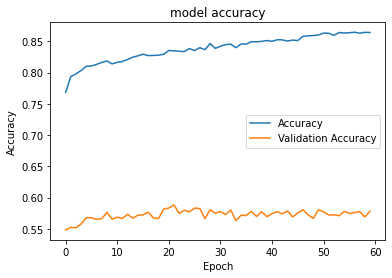

In [44]:
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy", "Validation Accuracy"])
plt.show()

In [46]:
# save model
model.save("model.h5")

In [ ]:
# load model
model = keras.models.load_model('model.h5')

2022-12-08 16:16:24.903299: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1073741824 exceeds 10% of free system memory.


In [50]:
results = model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)

21/21 [==============================] - 1s 37ms/step - loss: 3.4725 - accuracy: 0.5723
test loss, test acc: [3.47249436378479, 0.5723077058792114]
